In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import scipy.stats as sp

In [3]:
#file location 
file = "Resources/A_Marqueze et al.csv"

In [4]:
#import and read data to create original dataframe 
sleep_df = pd.read_csv(file)

In [5]:
#preview dataframe 
sleep_df

,id,Gender,Age,Satlazer,Countrycat,Workhourtotal1cat,Enoughsleepcat,Educationlevel,Satworkhour2,SleepQualitycat,...,Work5cat,Depression,Country_Occup_Work5,Sunworkmonth_H,Sunfreemonth_H,SUNWORKFREEMONTH_HOUR,Occup_Work5,Work3cat2,SUNWORKMONTH_HOUR_Mean_INV,SUNWORKMONTH_HOUR_Median_INV
0,1,1,33.0,1,0,0.0,0.0,2.0,1,0.0,...,1,0.0,3,140.0,24.0,106.86,3,1,0,0
1,2,1,64.0,0,0,1.0,0.0,1.0,0,0.0,...,1,0.0,3,160.0,8.0,116.57,3,1,0,0
2,3,1,39.0,0,0,1.0,1.0,2.0,1,0.0,...,1,1.0,3,160.0,NaN,NaN,3,1,0,0
3,4,1,36.0,0,0,1.0,0.0,2.0,2,0.0,...,1,1.0,3,120.0,16.0,90.29,3,1,0,1
4,5,1,22.0,0,0,1.0,0.0,2.0,0,0.0,...,1,0.0,3,100.0,8.0,73.71,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,580289,1,43.0,0,1,0.0,0.0,2.0,0,0.0,...,3,0.0,1,32.0,24.0,28.57,1,0,0,0
1757,580343,0,27.0,0,1,0.0,0.0,0.0,0,0.0,...,3,0.0,1,8.0,18.0,12.29,1,0,1,1
1758,580345,1,43.0,1,1,0.0,0.0,3.0,1,0.0,...,4,0.0,2,32.0,24.0,28.57,2,1,0,0
1759,580350,1,40.0,0,1,0.0,0.0,3.0,0,0.0,...,3,0.0,1,8.0,18.0,12.29,1,0,1,1


In [6]:
#preview columns 
sleep_df.columns

Index(['id', 'Gender', 'Age', 'Satlazer', 'Countrycat', 'Workhourtotal1cat',
       'Enoughsleepcat', 'Educationlevel', 'Satworkhour2', 'SleepQualitycat',
       'AwakeningProblemscat', 'Sleepinesscat', 'Bedtimew', 'Uptimew',
       'Bedtimef', 'Uptimef', 'Midsleepfreemean', 'Painneck_lowback',
       'Work5cat', 'Depression', 'Country_Occup_Work5', 'Sunworkmonth_H',
       'Sunfreemonth_H', 'SUNWORKFREEMONTH_HOUR', 'Occup_Work5', 'Work3cat2',
       'SUNWORKMONTH_HOUR_Mean_INV', 'SUNWORKMONTH_HOUR_Median_INV'],
      dtype='object')

In [7]:
sleep_df.dropna(inplace=True)

In [8]:
sleep_df.count()

id                              1534
Gender                          1534
Age                             1534
Satlazer                        1534
Countrycat                      1534
Workhourtotal1cat               1534
Enoughsleepcat                  1534
Educationlevel                  1534
Satworkhour2                    1534
SleepQualitycat                 1534
AwakeningProblemscat            1534
Sleepinesscat                   1534
Bedtimew                        1534
Uptimew                         1534
Bedtimef                        1534
Uptimef                         1534
Midsleepfreemean                1534
Painneck_lowback                1534
Work5cat                        1534
Depression                      1534
Country_Occup_Work5             1534
Sunworkmonth_H                  1534
Sunfreemonth_H                  1534
SUNWORKFREEMONTH_HOUR           1534
Occup_Work5                     1534
Work3cat2                       1534
SUNWORKMONTH_HOUR_Mean_INV      1534
S

In [9]:
# creating a variable to hold the actual hours slept for a workday, "w"
time_sleptw = sleep_df["Uptimew"]-sleep_df["Bedtimew"]
print(time_sleptw)

0        5.67
1        6.67
3        8.00
4        7.50
5       10.42
        ...  
1756     6.00
1757     6.67
1758     7.50
1759     8.00
1760     3.50
Length: 1534, dtype: float64


In [10]:
# creating a variable to hold the actual hours slept for a freeday, "f"
time_sleptf = sleep_df["Uptimef"]-sleep_df["Bedtimef"]
time_sleptf


0        9.67
1        8.67
3       10.50
4        9.50
5       10.42
        ...  
1756     8.00
1757    10.00
1758     9.50
1759     6.00
1760     4.75
Length: 1534, dtype: float64

In [11]:
#Creating new column for time slept workday
sleep_df["Time Slept w/ Work"]= time_sleptw

In [12]:
#Creating new column for time slept freeday
sleep_df["Time Slept w/ Free Time"]= time_sleptf

In [13]:
#listing out all columns in the dataframe
sleep_df.columns


Index(['id', 'Gender', 'Age', 'Satlazer', 'Countrycat', 'Workhourtotal1cat',
       'Enoughsleepcat', 'Educationlevel', 'Satworkhour2', 'SleepQualitycat',
       'AwakeningProblemscat', 'Sleepinesscat', 'Bedtimew', 'Uptimew',
       'Bedtimef', 'Uptimef', 'Midsleepfreemean', 'Painneck_lowback',
       'Work5cat', 'Depression', 'Country_Occup_Work5', 'Sunworkmonth_H',
       'Sunfreemonth_H', 'SUNWORKFREEMONTH_HOUR', 'Occup_Work5', 'Work3cat2',
       'SUNWORKMONTH_HOUR_Mean_INV', 'SUNWORKMONTH_HOUR_Median_INV',
       'Time Slept w/ Work', 'Time Slept w/ Free Time'],
      dtype='object')

In [14]:
#Using .replace to efficiently utilize the groupby function below.

sleep_df["Painneck_lowback"].replace([0, 1, 2], ["No Pain", "Neck or Back Pain", "Neck and Back Pain"], inplace=True)


In [15]:
#printing a preview of our new replacements within the column "Painneck_lowback"
sleep_df["Painneck_lowback"].head()

0    Neck or Back Pain
1              No Pain
3    Neck or Back Pain
4              No Pain
5              No Pain
Name: Painneck_lowback, dtype: object

In [16]:
# F Creating a new dataframe using the groupby function and new replaced data. 
#Also gibing the average time slept per each category
sleep_df_group_f = sleep_df.groupby("Painneck_lowback").mean()['Time Slept w/ Free Time']

<IPython.core.display.Javascript object>


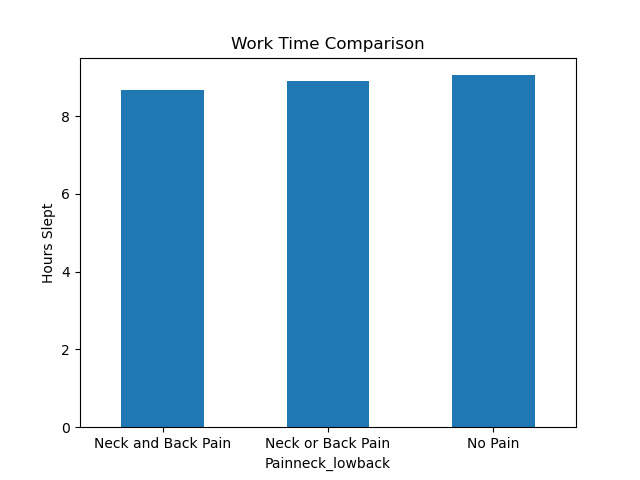

In [17]:
# F Bar chart for Neck and Back Pain vs Time Slept 
sleep_df_group_f.plot.bar(rot=0)
plt.title('Free Time Comparison')
plt.ylabel('Hours Slept')
plt.show()
plt.savefig('Figures/FreeTime_NeckandBackPain_bar.png',dpi=72)

In [18]:
# W Creating a new dataframe using the groupby function and new replaced data. 
#Also gibing the average time slept per each category
sleep_df_group = sleep_df.groupby("Painneck_lowback").mean()['Time Slept w/ Work']

In [19]:
# W Bar chart for Neck and Back Pain vs Time Slept 
sleep_df_group.plot.bar(rot=0)
plt.title('Work Time Comparison')
plt.ylabel('Hours Slept')
plt.show()
plt.savefig('Figures/WorkTime_NeckandBackPain_bar.png',dpi=72)

In [20]:
# F Created a new filtered dataframe in preparation of boxplot below. 
#colon to grab all rows, names of columns you wish to work with
sleep_df_filtered_f = sleep_df.loc[:,["Painneck_lowback", "Time Slept w/ Free Time"]]

<IPython.core.display.Javascript object>


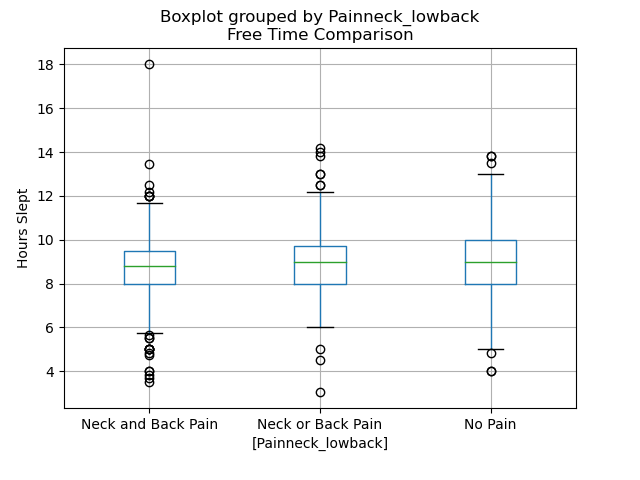

In [28]:
# F boxplot of sleep data frame working days 
sleep_df_filtered_f.boxplot(column=['Time Slept w/ Free Time'],by=['Painneck_lowback']) 
plt.title('Free Time Comparison')
plt.ylabel('Hours Slept')
plt.savefig('Figures/FreeTime_NeckandBackPain_box.png',dpi=72)

In [22]:
# W Created a new filtered dataframe in preparation of boxplot below. 
#colon to grab all rows, names of columns you wish to work with
sleep_df_filtered = sleep_df.loc[:,["Painneck_lowback", "Time Slept w/ Work"]]

<IPython.core.display.Javascript object>


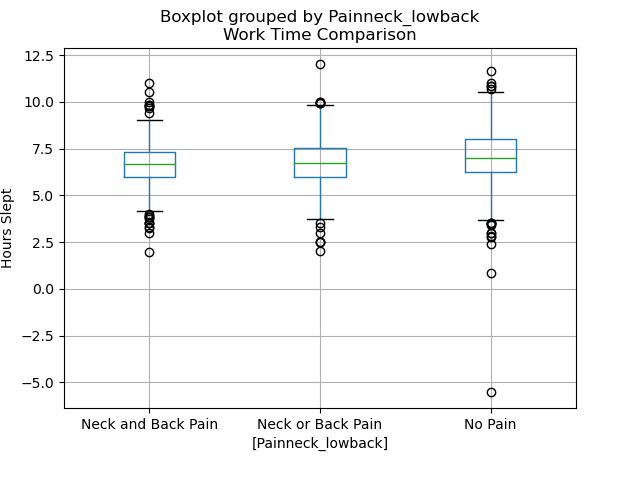

In [29]:
# W boxplot of sleep data frame working days 
sleep_df_filtered.boxplot(column=['Time Slept w/ Work'],by=['Painneck_lowback']) 
plt.title('Work Time Comparison')
plt.ylabel('Hours Slept')
plt.savefig('Figures/WorkTime_NeckandBackPain_box.png',dpi=72)

In [24]:
# W T Test prep of the data 
pain_yes = sleep_df.loc[
    ((sleep_df["Painneck_lowback"] == "Neck or Back Pain") 
                        |
    (sleep_df["Painneck_lowback"] == "Neck and Back Pain")), "Time Slept w/ Work"]
pain_no = sleep_df.loc[(sleep_df["Painneck_lowback"] == "No Pain", "Time Slept w/ Work")]


In [25]:
# W T Test 
sp.ttest_ind(pain_yes, pain_no, equal_var=False)

Ttest_indResult(statistic=-4.371900320746948, pvalue=1.3806587166228773e-05)

In [26]:
# F T Test prep of the data 
pain_yes_f = sleep_df.loc[
    ((sleep_df["Painneck_lowback"] == "Neck or Back Pain") 
                        |
    (sleep_df["Painneck_lowback"] == "Neck and Back Pain")), "Time Slept w/ Free Time"]
pain_no_f = sleep_df.loc[(sleep_df["Painneck_lowback"] == "No Pain", "Time Slept w/ Free Time")]


In [27]:
# F T Test 
sp.ttest_ind(pain_yes_f, pain_no_f, equal_var=False)

Ttest_indResult(statistic=-3.463842209988892, pvalue=0.0005541315008530127)